In [2]:
# !unzip EfficientNet-PyTorch-3D.zip

In [4]:
# !pip install evadb

In [72]:
!wget -nc "https://www.dropbox.com/s/2bdx240kfwi7rbb/FLAIR-e10-loss0.680-auc0.624.pth"
!wget -nc "https://raw.githubusercontent.com/georgia-tech-db/eva/master/tutorials/00-start-eva-server.ipynb"
%run 00-start-eva-server.ipynb
cursor = connect_to_server()

File ‘FLAIR-e10-loss0.680-auc0.624.pth’ already there; not retrieving.

File ‘00-start-eva-server.ipynb’ already there; not retrieving.

nohup eva_server > eva.log 2>&1 &


In [117]:
cursor.execute("""DROP UDF MRIClassifier;""")
response = cursor.fetch_all()
print(response)

cursor.execute("""CREATE UDF IF NOT EXISTS 
                  MRIClassifier
                  INPUT (frame NDARRAY UINT8(3, ANYDIM, ANYDIM)) 
                  OUTPUT (results NDARRAY FLOAT32(ANYDIM, ANYDIM)) 
                  TYPE  Classification 
                  IMPL 'CustomModel.py';
        """)
        
response = cursor.fetch_all()
print(response)

@status: ResponseStatus.SUCCESS
@batch: 
                                         0
0  UDF MRIClassifier successfully dropped
@query_time: 0.028712958000141953
@status: ResponseStatus.SUCCESS
@batch: 
                                                        0
0  UDF MRIClassifier successfully added to the database.
@query_time: 0.1696943189999729


In [118]:
cursor.execute("DROP TABLE test;")
response = cursor.fetch_all()
print(response)

@status: ResponseStatus.SUCCESS
@batch: 
                                   0
0  Table Successfully dropped: test
@query_time: 0.04937605600025563


In [119]:
cursor.execute("LOAD IMAGE 'test1.png' INTO test;")
response = cursor.fetch_all()
print(response)
cursor.execute("LOAD IMAGE 'test2.png' INTO test;")
response = cursor.fetch_all()
print(response)
cursor.execute("LOAD IMAGE 'test3.png' INTO test;")
response = cursor.fetch_all()
print(response)
cursor.execute("LOAD IMAGE 'test4.png' INTO test;")
response = cursor.fetch_all()
print(response)
cursor.execute("LOAD IMAGE 'test5.png' INTO test;")
response = cursor.fetch_all()
print(response)
cursor.execute("LOAD IMAGE 'test6.png' INTO test;")
response = cursor.fetch_all()
print(response)

@status: ResponseStatus.SUCCESS
@batch: 
                            0
0  Number of loaded IMAGE: 1
@query_time: 0.1286571910004568
@status: ResponseStatus.SUCCESS
@batch: 
                            0
0  Number of loaded IMAGE: 1
@query_time: 0.02642560799995408
@status: ResponseStatus.SUCCESS
@batch: 
                            0
0  Number of loaded IMAGE: 1
@query_time: 0.026448275999428006
@status: ResponseStatus.SUCCESS
@batch: 
                            0
0  Number of loaded IMAGE: 1
@query_time: 0.02563008400011313
@status: ResponseStatus.SUCCESS
@batch: 
                            0
0  Number of loaded IMAGE: 1
@query_time: 0.02585682200060546
@status: ResponseStatus.SUCCESS
@batch: 
                            0
0  Number of loaded IMAGE: 1
@query_time: 0.02626650199999858


In [120]:
cursor.execute("""SELECT data, MRIClassifier(data)
                  FROM test """)
response = cursor.fetch_all()
print(response.batch)

                                                                                             test.data  \
0  [[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0 0]\n [0 0 0]\n [0 0 0]], [[0 0 0]\n [0 0 0]\n [0 0 0]...   
1  [[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0 0]\n [0 0 0]\n [0 0 0]], [[0 0 0]\n [0 0 0]\n [0 0 0]...   
2  [[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0 0]\n [0 0 0]\n [0 0 0]], [[0 0 0]\n [0 0 0]\n [0 0 0]...   
3  [[[0 0 0]\n [0 0 0]\n [0 0 0]\n [0 0 0]\n [0 0 0]\n [0 0 0]\n [0 0 0]\n [0 0 0]\n [0 0 0]\n [0 0...   
4  [[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0 0]\n [0 0 0]\n [0 0 0]], [[0 0 0]\n [0 0 0]\n [0 0 0]...   
5  [[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0 0]\n [0 0 0]\n [0 0 0]], [[0 0 0]\n [0 0 0]\n [0 0 0]...   

   mriclassifier.results  
0                    1.0  
1                    1.0  
2                    1.0  
3                    0.0  
4                    0.0  
5                    1.0  


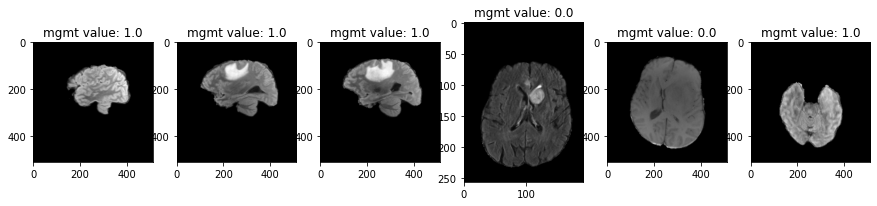

In [141]:
# !pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np

# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=[15,18])

df = response.batch.frames
for i in range(len(df)):
  img = df['test.data'].iloc[i]
  label = df['mriclassifier.results'].iloc[i]
  ax[i].imshow(img)
  ax[i].set_title(f'mgmt value: {label}')

plt.show()